# SMOTE-NC

Mở rộng chức năng của SMOTE để áp dụng cho các biến hạng mục (categorical variables).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTENC

## Create data


In [4]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# add categorical features
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 4), (1000,))

In [5]:
X.head()

,VarA,VarB,VarC,VarD
0,-0.201632,-0.858571,C,Green
4,-2.177525,1.515193,A,Blue
6,-0.411486,-3.758180,C,Green
7,0.072198,-0.031151,B,Blue
12,1.477885,1.326509,A,Green


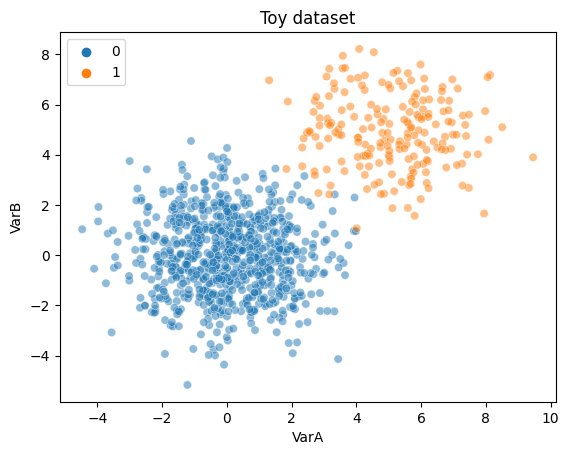

In [6]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

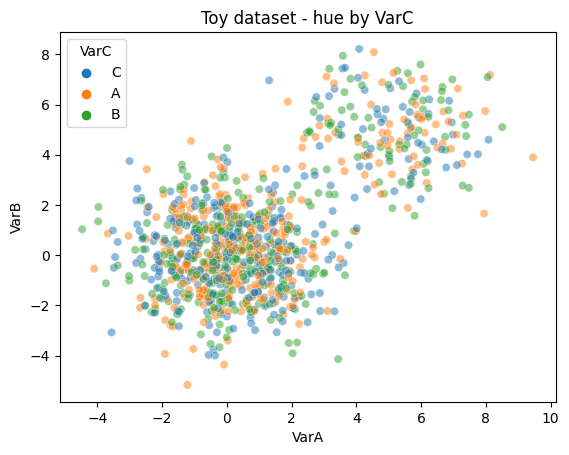

In [7]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarC', alpha=0.5
)

plt.title('Toy dataset - hue by VarC')
plt.show()

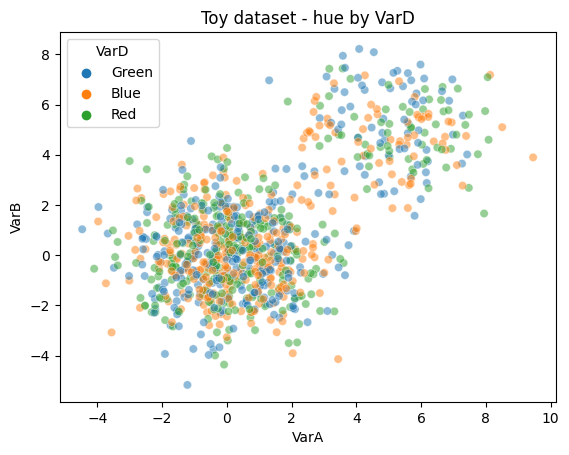

In [8]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue='VarD', alpha=0.5
)

plt.title('Toy dataset - hue by VarD')
plt.show()

## SMOTE-NC

[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)

In [10]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4,
    categorical_features=[2,3] # indeces of the columns of categorical variables
)  

X_res, y_res = smnc.fit_resample(X, y)

c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [11]:
# size of original data

X.shape, y.shape

((1000, 4), (1000,))

In [12]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 4), (1600,))

In [14]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64)

In [15]:
X.tail()

,VarA,VarB,VarC,VarD
176,7.105782,3.586964,C,Blue
1264,5.695119,6.965347,A,Green
351,5.478893,5.399796,A,Green
1572,5.891548,3.598403,A,Green
1056,4.965448,4.873293,A,Red


In [16]:
X_res.tail()

,VarA,VarB,VarC,VarD
1595,5.915384,2.934523,B,Green
1596,6.116965,4.248787,B,Green
1597,7.319712,5.042528,A,Red
1598,6.072812,5.834270,B,Red
1599,2.718953,4.979515,B,Blue


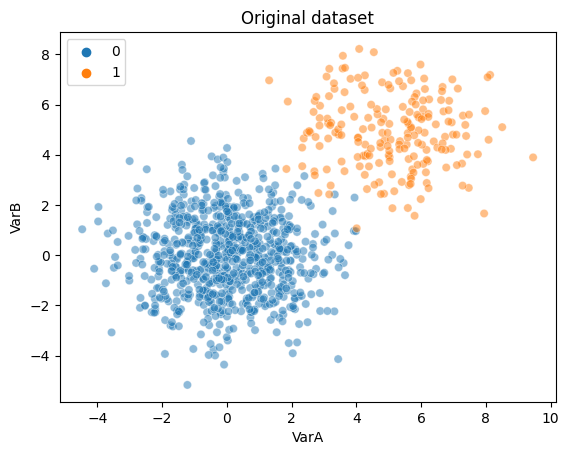

In [17]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

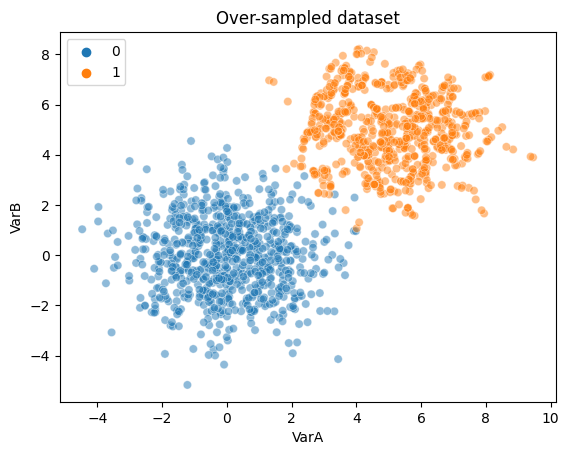

In [18]:

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()